# Fama-Miller Center Exam - XiaoyuOuyang

In [687]:
import pandas as pd
import numpy as np
from scipy.stats import t
import geopandas as gpd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format',  '{:,.2f}'.format)

## Preprocess Data 

In [689]:
# Load all datasets
bds = pd.read_csv("bds2019_cty.csv")
bds_sec = pd.read_csv("bds2019_cty_sec.csv")
cbp03 = pd.read_csv("cbp03co.txt", sep=",")
cbp04 = pd.read_csv("cbp04co.txt", sep=",")
cbp05 =pd.read_csv("cbp05co.txt", sep=",")
cbp06 = pd.read_csv("cbp06co.txt", sep=",")

# Preprocess CBP data to only keep rows with "EMPFLAG" (Data Suppression Flag) = NaN
# Only choose CBP data with NAICS = "------" which sums up other columns for all sectors
def process_cbp(df, year):
    new_df = df[(df["empflag"].isna()) & (df["naics"] == "------")]
    new_df["year"] = year
    return new_df
cbp03 = process_cbp(cbp03, 2003)
cbp04 = process_cbp(cbp04, 2004)
cbp05 = process_cbp(cbp05, 2005)
cbp06 = process_cbp(cbp06, 2006)

## Question 1(a)

In [728]:
def sumstats_table(df, var):
    var_numeric = pd.to_numeric(df[var] , errors='coerce').dropna()
    ret_df = pd.DataFrame(var_numeric.describe())
    return ret_df

def stats_table_year(bds_LA, cbp, year):
    bds = bds_LA[bds_LA["year"] == year]
    col_bds = ["estabs_entry_rate","estabs_exit","net_job_creation_rate"]
    st1, st2, st3= sumstats_table(bds, col_bds[0]), sumstats_table(bds, col_bds[1]), sumstats_table(bds, col_bds[2])
    ret_df1 = pd.concat([st1,st2,st3], axis=1)
    ret_df2 = sumstats_table(cbp_all, "ap")
    other_col = cbp_all.columns[8:21]
    for col in other_col:
        one_df = sumstats_table(cbp, col)
        ret_df2 = pd.concat([ret_df2, one_df], axis=1)
    ret_df = pd.concat([ret_df1, ret_df2], axis =1).T
#     ret_df = ret_df.style.set_caption("Summary Statistics Table for Lousisiana area for "+str(year))
    return ret_df

In [731]:
# Statistics Table of variables in bds 
bds_03to06 = bds[(bds["year"]>=2003) & (bds["year"]<=2006)]
col_bds = ["estabs_entry_rate","estabs_exit","net_job_creation_rate"]
st1, st2, st3= sumstats_table(bds_03to06, col_bds[0]), sumstats_table(bds_03to06, col_bds[1]), sumstats_table(bds_03to06, col_bds[2])
ret_df1 = pd.concat([st1,st2,st3], axis=1)

#  Statistics Table of variables in cbp
cbp_all = pd.concat([cbp03,cbp04,cbp05,cbp06])
ret_df2 = sumstats_table(cbp_all, "ap")
other_col = cbp_all.columns[8:21]
for col in other_col:
    one_df = sumstats_table(cbp_all, col)
    ret_df2 = pd.concat([ret_df2, one_df], axis=1)

#  Statistics Table of all variables
ret_df = pd.concat([ret_df1, ret_df2], axis =1).T
# ret_df.style.set_caption("Summary Statistics Table for the overall sample restricted to 2003-2006")
ret_df

,count,mean,std,min,25%,50%,75%,max
estabs_entry_rate,"12,667.00",11.15,7.19,0.00,8.62,10.27,12.37,200.00
estabs_exit,"12,687.00",206.48,739.78,0.00,20.00,46.00,122.00,"23,009.00"
net_job_creation_rate,"12,855.00",1.87,12.59,-200.00,-1.21,1.52,4.48,200.00
ap,"8,796,351.00","10,449.81","275,029.92",0.00,0.00,0.00,759.00,"187,517,159.00"
n1_4,"8,796,351.00",11.00,190.92,0.00,1.00,1.00,4.00,"145,039.00"
n5_9,"8,796,351.00",3.84,59.49,0.00,0.00,0.00,2.00,"41,634.00"
n10_19,"8,796,351.00",2.56,40.92,0.00,0.00,0.00,1.00,"28,487.00"
n20_49,"8,796,351.00",1.75,30.18,0.00,0.00,0.00,1.00,"21,273.00"
n50_99,"8,796,351.00",0.60,10.96,0.00,0.00,0.00,0.00,"7,599.00"
n100_249,"8,796,351.00",0.34,6.35,0.00,0.00,0.00,0.00,"4,320.00"


## Question 1(b)

In [732]:
# Restrict dataframes to Lousiana only (state code = 22)
bds_LA = bds_03to06[bds_03to06["st"] == 22]
cbp03LA = cbp03[cbp03["fipstate"]==22]
cbp04LA = cbp04[cbp04["fipstate"]==22]
cbp05LA = cbp05[cbp05["fipstate"]==22]
cbp06LA = cbp06[cbp06["fipstate"]==22]

In [733]:
# Summary Statistics Table for Lousisiana area for 2003
stats_table_year(bds_LA = bds_LA, cbp = cbp03LA, year=2003)

,count,mean,std,min,25%,50%,75%,max
estabs_entry_rate,65.00,9.80,1.82,6.27,8.62,9.62,10.66,15.13
estabs_exit,65.00,132.83,225.15,12.00,26.00,46.00,123.00,"1,070.00"
net_job_creation_rate,65.00,1.81,5.40,-13.76,-0.23,2.22,4.38,19.85
ap,"8,796,351.00","10,449.81","275,029.92",0.00,0.00,0.00,759.00,"187,517,159.00"
n1_4,"44,913.00",6.85,62.95,0.00,1.00,1.00,4.00,"6,306.00"
n5_9,"44,913.00",2.87,26.00,0.00,0.00,0.00,2.00,"2,587.00"
n10_19,"44,913.00",1.86,17.43,0.00,0.00,0.00,1.00,"1,777.00"
n20_49,"44,913.00",1.30,12.65,0.00,0.00,0.00,1.00,"1,250.00"
n50_99,"44,913.00",0.44,4.54,0.00,0.00,0.00,0.00,468.00
n100_249,"44,913.00",0.22,2.30,0.00,0.00,0.00,0.00,224.00


In [734]:
# Summary Statistics Table for Lousisiana area for 2004
stats_table_year(bds_LA = bds_LA, cbp = cbp04LA, year=2004)

,count,mean,std,min,25%,50%,75%,max
estabs_entry_rate,65.00,9.98,2.17,5.72,8.60,9.70,10.31,18.08
estabs_exit,66.00,124.26,214.93,0.00,23.00,45.00,94.25,"1,015.00"
net_job_creation_rate,66.00,4.45,24.80,-8.79,-2.55,2.38,4.59,197.95
ap,"8,796,351.00","10,449.81","275,029.92",0.00,0.00,0.00,759.00,"187,517,159.00"
n1_4,"44,873.00",6.88,63.13,0.00,0.00,1.00,4.00,"6,215.00"
n5_9,"44,873.00",2.90,26.26,0.00,0.00,0.00,2.00,"2,677.00"
n10_19,"44,873.00",1.89,17.53,0.00,0.00,0.00,1.00,"1,779.00"
n20_49,"44,873.00",1.32,12.81,0.00,0.00,0.00,1.00,"1,248.00"
n50_99,"44,873.00",0.45,4.66,0.00,0.00,0.00,0.00,479.00
n100_249,"44,873.00",0.22,2.32,0.00,0.00,0.00,0.00,230.00


In [735]:
# Summary Statistics Table for Lousisiana area for 2005
stats_table_year(bds_LA = bds_LA, cbp = cbp05LA, year=2005)

,count,mean,std,min,25%,50%,75%,max
estabs_entry_rate,66.00,10.59,8.26,6.44,8.60,9.27,10.53,75.00
estabs_exit,65.00,133.66,226.87,9.00,25.00,47.00,123.00,"1,084.00"
net_job_creation_rate,66.00,-1.55,6.50,-18.41,-5.27,-1.27,2.17,14.88
ap,"8,796,351.00","10,449.81","275,029.92",0.00,0.00,0.00,759.00,"187,517,159.00"
n1_4,"44,965.00",6.89,62.65,0.00,1.00,1.00,4.00,"6,154.00"
n5_9,"44,965.00",2.90,25.89,0.00,0.00,0.00,2.00,"2,570.00"
n10_19,"44,965.00",1.89,17.59,0.00,0.00,0.00,1.00,"1,778.00"
n20_49,"44,965.00",1.27,12.45,0.00,0.00,0.00,1.00,"1,218.00"
n50_99,"44,965.00",0.44,4.64,0.00,0.00,0.00,0.00,490.00
n100_249,"44,965.00",0.22,2.35,0.00,0.00,0.00,0.00,223.00


In [736]:
# Summary Statistics Table for Lousisiana area for 2006
stats_table_year(bds_LA = bds_LA, cbp = cbp06LA, year=2006)

,count,mean,std,min,25%,50%,75%,max
estabs_entry_rate,66.00,11.02,2.64,0.00,9.53,10.86,12.52,16.49
estabs_exit,65.00,193.51,461.61,7.00,27.00,52.00,140.00,"3,078.00"
net_job_creation_rate,66.00,1.15,13.51,-78.97,-0.11,4.19,7.16,18.16
ap,"8,796,351.00","10,449.81","275,029.92",0.00,0.00,0.00,759.00,"187,517,159.00"
n1_4,"44,828.00",6.98,63.84,0.00,1.00,1.00,4.00,"6,423.00"
n5_9,"44,828.00",2.77,24.23,0.00,0.00,0.00,2.00,"2,444.00"
n10_19,"44,828.00",1.85,16.64,0.00,0.00,0.00,1.00,"1,657.00"
n20_49,"44,828.00",1.25,11.88,0.00,0.00,0.00,1.00,"1,240.00"
n50_99,"44,828.00",0.45,4.43,0.00,0.00,0.00,0.00,484.00
n100_249,"44,828.00",0.23,2.32,0.00,0.00,0.00,0.00,243.00


## Question 2

In [700]:
# Data for 2004 and 2006 Louisiana Establishment Exit Rates 
bds_LA_04 = bds[(bds["st"] == 22) & (bds["year"] == 2004)]
bds_LA_06 = bds[(bds["st"] == 22) & (bds["year"] == 2006)]

# the largest valid region code for counties is 997
bds_LA_04 = bds_LA_04[bds_LA_04["cty"] <= 997]  
bds_LA_06 = bds_LA_06[bds_LA_06["cty"] <= 997]

# Add an additional column to match "CODE_LOCAL" in the format of "22cty"
add_col = lambda x: 22000+x
bds_LA_04["code_local"] = bds_LA_04["cty"].apply(add_col)
bds_LA_06["code_local"] = bds_LA_06["cty"].apply(add_col)

# read readfile for plotting using geopandas
shapefile = "ne_10m_admin_2_counties.shp"
geo_df = gpd.read_file(shapefile)[['NAME','CODE_LOCAL', 'geometry','REGION_COD']]
geo_df = geo_df[geo_df["REGION_COD"]=='22']
geo_df["CODE_LOCAL"] = geo_df["CODE_LOCAL"].astype(int)
merged_df_04 = pd.merge(left=geo_df, right=bds_LA_04, how='left', left_on='CODE_LOCAL', right_on='code_local')
merged_df_06 = pd.merge(left=geo_df, right=bds_LA_06, how='left', left_on='CODE_LOCAL', right_on='code_local')

In [701]:
def plot_heatmap(df, year):
    title = 'Heatmap of Establishment Exit Rates by county of LA in ' + str(year)
    col = 'estabs_exit_rate'
    vmin = df[col].min()
    vmax = df[col].max()
    cmap = 'viridis'

    # Create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(20, 20))
    ax.axis('off')
    df.apply(lambda x: ax.annotate(text=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center', fontsize= 10), axis=1)
    df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

    # Add the colorbar to the figure
    cbaxes = fig.add_axes([0.05, 0.25, 0.01, 0.4])
    cbar = fig.colorbar(sm, cax=cbaxes)

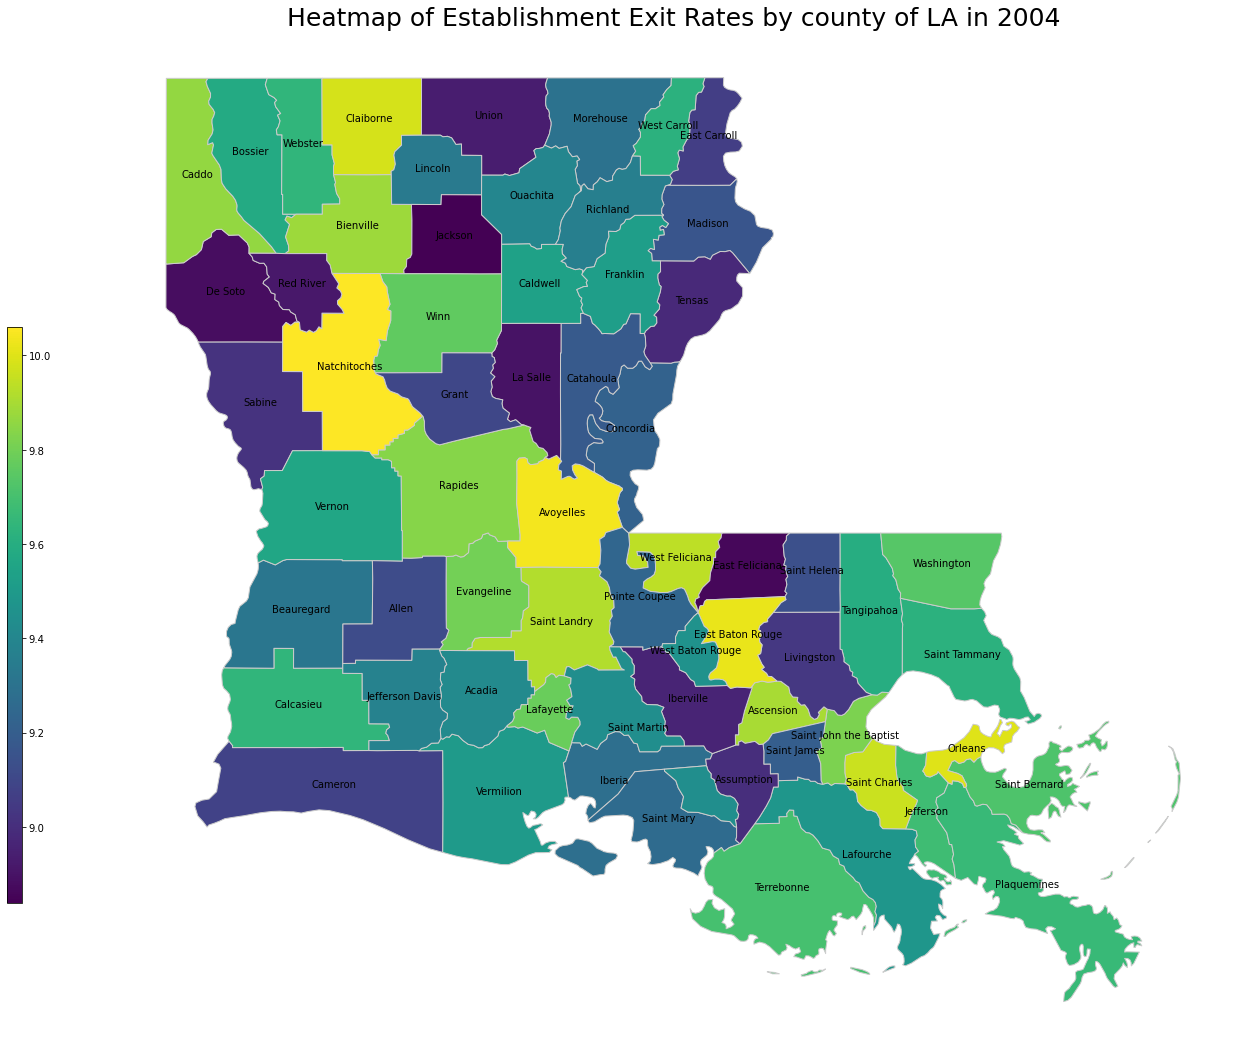

In [702]:
# Plot the heatmap of LA in 2004
plot_heatmap(merged_df_04, 2004)

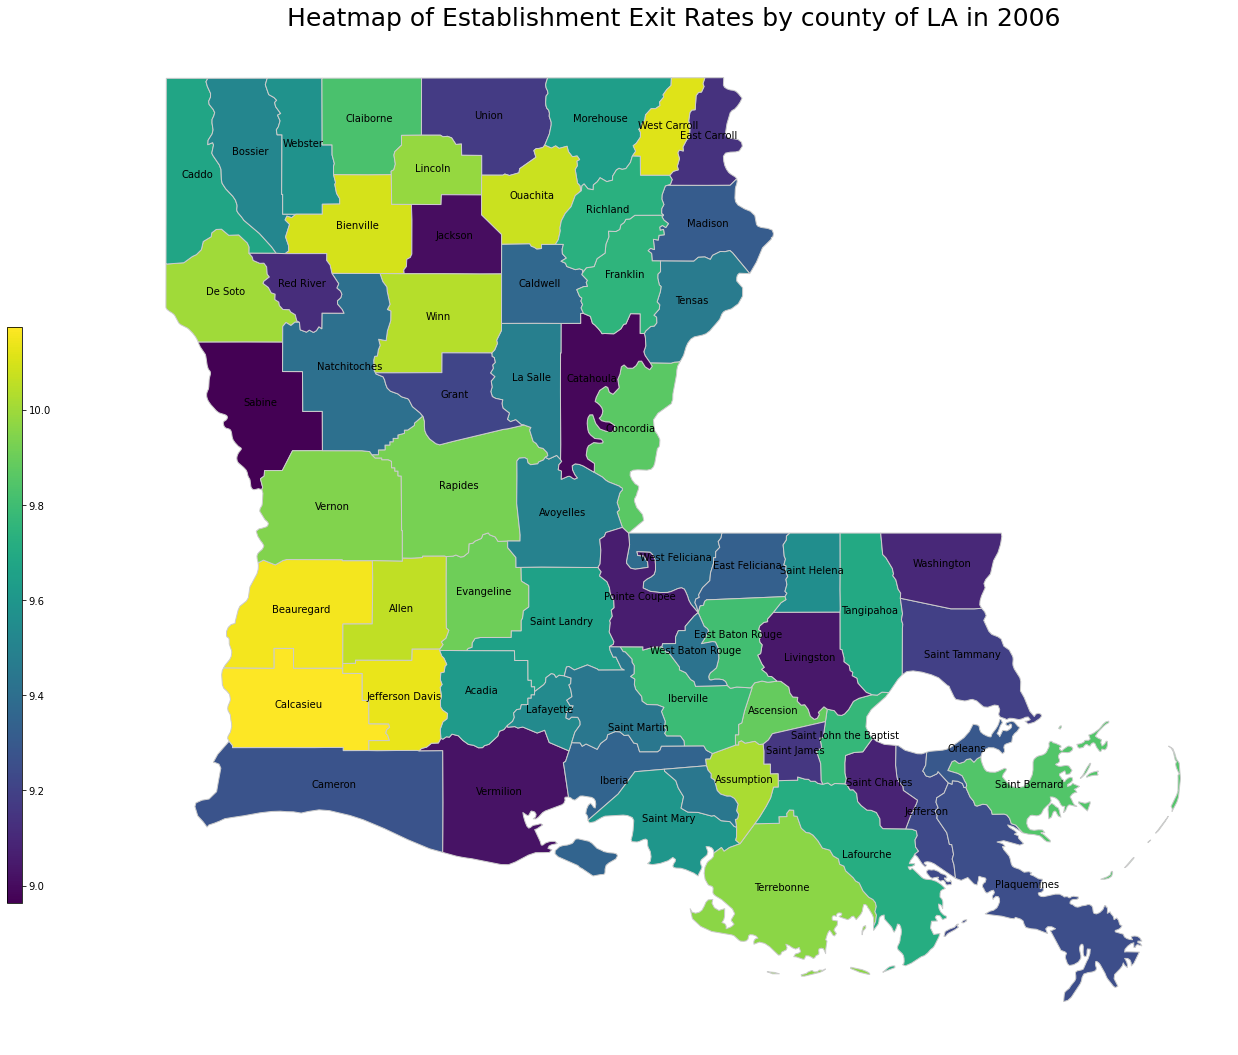

In [703]:
# Plot the heatmap of LA in 2006
plot_heatmap(merged_df_06, 2006)

## Question 3

To analyze the impact of Hurricane in 2006, I run two regressions with constants for coastal and non-coastal counties respectively. Response variables are Establishment Exit Rates(EER) and Growth in Annual Payroll per Employee ratio (AP_per_EMP). The only explanatory variable is the dummy variable representing event which is an indicator of whether Hurricane happened or not. These can be expressed as:

**Linear Model 1** 
**Linear Model 2** 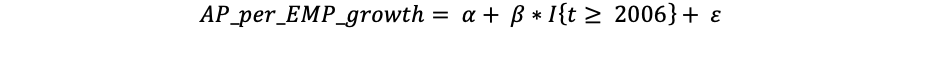
where t is the year and 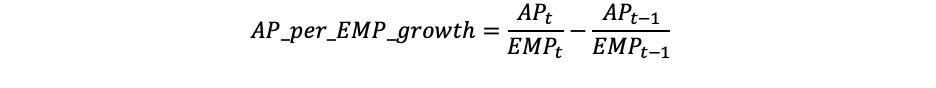

### Part (a) - Linear Model 1

In [704]:
# Exact data for coastal and non-coastal counties from 2003-2006 (BDS)
bds_LA = bds_03to06[(bds_03to06["st"] == 22) & (bds_03to06["cty"] <= 997)]
def prepare_BDS(bds_LA):
    event_func = lambda x: 1 if x>=2006 else 0
    bds_LA["event_occurs"] = bds_LA["year"].apply(event_func)
    bds_LA["code_local"] = bds_LA["cty"].apply(add_col)
    bds_LA = pd.merge(right = geo_df[["NAME","CODE_LOCAL"]], left = bds_LA, how='left', right_on='CODE_LOCAL', left_on='code_local').drop(columns=["CODE_LOCAL"])
    coast  = ["Cameron","Vermilion","Iberia","Saint Mary","Terrebonne","Lafourche","Jefferson","Plaquemines","Saint Bernard","Orleans","Saint Tammany"]
    bds_coast = bds_LA[bds_LA["NAME"].isin(coast)]
    bds_noncoast = bds_LA[~bds_LA["NAME"].isin(coast)]
    return bds_coast, bds_noncoast
bds_coast, bds_noncoast = prepare_BDS(bds_LA = bds_LA)

In [705]:
# Run Regressions 
def OLS_EER(df, title_sup):
    X = sm.add_constant(np.asarray(df["event_occurs"]))
    Y = np.asarray(df["estabs_exit_rate"].astype("float"))
    model = sm.OLS(Y,X).fit()
    return model.summary(title="OLS Regression Results of Linear Model 1 for "+ str(title_sup) + " counties")

OLS_EER(bds_coast, "coastal")

<class 'statsmodels.iolib.summary.Summary'>
"""
        OLS Regression Results of Linear Model 1 for coastal counties         
==============================================================================
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     12.05
Date:                Sat, 25 Feb 2023   Prob (F-statistic):            0.00121
Time:                        08:01:18   Log-Likelihood:                -168.60
No. Observations:                  44   AIC:                             341.2
Df Residuals:                      42   BIC:                             344.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1792      1.989      4.614      0.000       5.164      13.194
x1            13.8117      3.979      3.471      0.001       5.782      21.842
==============================================================================
Omnibus:                       69.449   Durbin-Watson:                   2.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              837.758
Skew:                           3.843   Prob(JB):                    1.21e-182
Kurtosis:                      22.947   Cond. No.                         2.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This regression results table generally indicates that Hurricane Katrina has a significant effect to the Establishment Exit Rates of coastal counties. 
- R_squared = 0.223 shows that 22.3% of the change in ‘EER’ variable can be explained by the Hurricane and this linear model is a good fit to data.
- P>|t| for x1 = 0.001 shows that the event variable is very statistically siginificant as its p-value of the event variable is even smaller than 0.05.
- coef for x1 = 13.8117 shows that after the hurricane happens, the EER increases largely by 13.8117. This is consistent with our expectation that when a disaster strikes, businesses along the coastline are negatively affected and exit those counties. 

In [737]:
OLS_EER(bds_noncoast, "non-coastal")

<class 'statsmodels.iolib.summary.Summary'>
"""
      OLS Regression Results of Linear Model 1 for non-coastal counties       
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.01741
Date:                Sat, 25 Feb 2023   Prob (F-statistic):              0.895
Time:                        08:35:55   Log-Likelihood:                -436.24
No. Observations:                 212   AIC:                             876.5
Df Residuals:                     210   BIC:                             883.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2138      0.151     61.047      0.000       8.916       9.511
x1             0.0398      0.302      0.132      0.895      -0.555       0.635
==============================================================================
Omnibus:                       27.701   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.631
Skew:                           0.774   Prob(JB):                     1.50e-09
Kurtosis:                       4.484   Cond. No.                         2.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This regression results table indicates that Hurricane Katrina does not have a significant effect to the Establishment Exit Rates of non-coastal counties.

- R_squared = 0.000 shows that almost none of the change in ‘EER’ variable can be explained by the Hurricane.
- P>|t| for x1 = 0.895 shows that the event variable is not statistically siginificant as its p-value of the event variable is far above 0.05. This indicates strong evidence for the null hypothesis.
- coef for x1 = 0.0398 shows that after the hurricane happens, the EER increases minimally by 0.0398 in non-coastal counties. This is also consistent with our expectation that when a disaster strikes, businesses not along the coastline are negatively but minimally affected.

**To summarize, the Hurricane Katrina has a significant impact on coastal counties and a trivial impact on non-coastal counties in terms of higher Establishment Exist Rates.**

### Part (b) - Linear Model 2

In [707]:
# Exact data for coastal and non-coastal counties from 2003-2006 (CBP)
cbp_LA = cbp_all[cbp_all["fipstate"]==22]
cbp_LA["event_occurs"] = cbp_LA["year"].apply(event_func)
cbp_LA["code_local"] = cbp_LA["fipscty"].apply(add_col)
cbp_LA = pd.merge(right = geo_df[["NAME","CODE_LOCAL"]], left = cbp_LA, how='left', right_on='CODE_LOCAL', left_on='code_local').drop(columns=["CODE_LOCAL"])
cbp_LA = cbp_LA[["ap","emp","year","NAME","event_occurs"]]
cbp_coast = cbp_LA[cbp_LA["NAME"].isin(coast)]
cbp_noncoast = cbp_LA[~cbp_LA["NAME"].isin(coast)]

In [708]:
# Calculate the response variable: growth in (ap/emp)
def cal_growth(df):
    df = df.sort_values(by=["NAME","year"])
    df["ap_per_emp_growth"] = (df["ap"] / df["emp"]).diff()
     # exclude year 2003 as we do not have data in 2002
    return df[df["year"] != 2003]
cbp_coast = cal_growth(cbp_coast)
cbp_noncoast = cal_growth(cbp_noncoast)
cbp_coast.head()

,ap,emp,year,NAME,event_occurs,ap_per_emp_growth
76,61761,1855,2004,Cameron,0,-1.89
141,57888,1548,2005,Cameron,0,4.10
206,62816,1283,2006,Cameron,1,11.56
87,855396,26666,2004,Iberia,0,-0.16
152,925416,26163,2005,Iberia,0,3.29


In [709]:
# Run Regressions 
def OLS_growth(df, title_sup):
    X = sm.add_constant(np.asarray(df["event_occurs"]))
    Y = np.asarray(df["ap_per_emp_growth"])
    model = sm.OLS(Y,X).fit()
    return model.summary(title="OLS Regression Results of Linear Model 2 for "+ str(title_sup) + " counties")

OLS_growth(cbp_coast, "coastal")

<class 'statsmodels.iolib.summary.Summary'>
"""
        OLS Regression Results of Linear Model 2 for coastal counties         
==============================================================================
Dep. Variable:                      y   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     18.81
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           0.000142
Time:                        08:01:22   Log-Likelihood:                -91.661
No. Observations:                  33   AIC:                             187.3
Df Residuals:                      31   BIC:                             190.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0038      0.856      1.173      0.250      -0.742       2.749
x1             6.4293      1.482      4.337      0.000       3.406       9.453
==============================================================================
Omnibus:                       23.203   Durbin-Watson:                   2.583
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.613
Skew:                           1.583   Prob(JB):                     1.25e-10
Kurtosis:                       7.811   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This regression results table generally indicates that Hurricane Katrina has a significant effect to the growth in Annual Payroll per Employee ratio (AP/EMP growth) of coastal counties.

- R_squared = 0.378 shows that 37.8% of the change in ‘AP/EMP growth’ can be explained by the Hurricane and this linear model is a good fit to data.
- P>|t| for x1 = 0.000 shows that the event variable is very statistically siginificant as its p-value of the event variable is much smaller than 0.05.
- coef for x1 = 6.429 shows that after the hurricane happens, AP/EMP growth increases largely by 6.429. A possible reason is that when a disaster strikes, people along the coastline exit those counties and businesses need to pay higher salaries to retain their employees or attract new talents.

In [710]:
OLS_growth(cbp_noncoast, "non-coastal")

<class 'statsmodels.iolib.summary.Summary'>
"""
      OLS Regression Results of Linear Model 2 for non-coastal counties       
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.267
Date:                Sat, 25 Feb 2023   Prob (F-statistic):              0.262
Time:                        08:01:31   Log-Likelihood:                -314.62
No. Observations:                 162   AIC:                             633.2
Df Residuals:                     160   BIC:                             639.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3644      0.163      8.351      0.000       1.042       1.687
x1            -0.3185      0.283     -1.126      0.262      -0.877       0.240
==============================================================================
Omnibus:                       20.426   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.237
Skew:                          -0.302   Prob(JB):                     7.58e-17
Kurtosis:                       6.261   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This regression results table indicates that Hurricane Katrina does not have a significant effect to the AP/EMP growth of non-coastal counties.

- R_squared = 0.008 shows that almost none of the change in ‘AP/EMP’ variable can be explained by the Hurricane.
- P>|t| for x1 = 0.262 shows that the event variable is not statistically significant as its p-value of the event variable is far above 0.05. 

**To summarize, the Hurricane Katrina has a significant impact on coastal counties and a trivial impact on non-coastal counties in terms of higher growth in Annual Payroll per Employee ratio.**

## Question 4

In [711]:
# Create a dictionary mapping NAICS code to its representing industry
NAICS_dict = {
    "11": "Agriculture, Forestry, Fishing and Hunting",
    "21": "Mining, Quarrying, and Oil and Gas Extraction",
    "22": "Utilities",
    "23": "Construction",
    "31-33": "Manufacturing",
    "42": "Wholesale Trade",
    "44-45": "Retail Trade",
    "48-49": "Transportation and Warehousing",
    "51": "Information",
    "52": "Finance and Insurance",
    "53": "Real Estate and Rental and Leasing",
    "54": "Professional, Scientific, and Technical Services",
    "55": "Management of Companies and Enterprises",
    "56": "Administrative and Support and Waste Management and Remediation Services",
    "61": "Educational Services",
    "62": "Health Care and Social Assistance",
    "71": "Arts, Entertainment, and Recreation",
    "72": "Accommodation and Food Services",
    "81": "Other Services (except Public Administration)"
}

In [712]:
# Exact data for coastal and non-coastal counties from 2003-2006 (BDS with sectors)
bds_sec = pd.read_csv("bds2019_cty_sec.csv")
bds_sec = bds_sec[~pd.to_numeric(bds_sec["estabs_exit_rate"] , errors='coerce').isna()] # drop the rows with values "(D)"
bds_sec_LA = bds_sec[(bds_sec["year"]>=2003) &( bds_sec["year"]<=2006) & (bds_sec["st"]==22)]
sec_coast, sec_noncoast = prepare_BDS(bds_LA = bds_sec_LA)

In [713]:
# Run regressions to get coefficients and 95% confidence intervals of the event variable 
def OLS_EER_params(df, sec_code):
    df = df[df["sector"]==sec_code]
    X = sm.add_constant(np.asarray(df["event_occurs"]))
    Y = np.asarray(df["estabs_exit_rate"].astype("float"))
    model = sm.OLS(Y,X).fit()
    coef = model.params[1]
    conf_int = model.conf_int(alpha=0.05, cols=None)[1]
    p_value = model.pvalues[1]
    return coef, conf_int,p_value

# Create a regression table in ascending order of coefficient
def regression_table(df):
    sec_code_list = list(set(df["sector"]))
    ret_df = pd.DataFrame(columns = ["sector_code","sector_name","coefficient","confidence_interval", "p_value"])
    for i in range(len(sec_code_list)):
        sec_code = sec_code_list[i]
        ret_df.loc[i, "sector_code"] = sec_code
        ret_df.loc[i, "sector_name"] = NAICS_dict[sec_code]
        coef, conf_int, p_value = OLS_EER_params(df, sec_code)
        conf_int = [round(x, 2) for x in conf_int]
        ret_df.loc[i,"coefficient"] = coef
        ret_df.loc[i,"confidence_interval"] = str(conf_int)
        ret_df.loc[i, "p_value"] = p_value
    ret_df = ret_df.set_index("sector_name")
    return ret_df.sort_values("p_value", ascending = False)

reg_df_coastal = regression_table(sec_coast).dropna()
reg_df_coastal = reg_df_coastal.style.set_caption("Regression table of different sectors for coastal counties")
reg_df_coastal

,sector_code,coefficient,confidence_interval,p_value
sector_name,,,,
Management of Companies and Enterprises,55,-1.135962,"[-8.79, 6.52]",0.757938
"Mining, Quarrying, and Oil and Gas Extraction",21,-5.235538,"[-14.93, 4.46]",0.279617
Transportation and Warehousing,48-49,2.669736,"[-1.39, 6.73]",0.190894
Administrative and Support and Waste Management and Remediation Services,56,4.692798,"[-1.74, 11.12]",0.147513
"Agriculture, Forestry, Fishing and Hunting",11,45.000000,"[-11.2, 101.2]",0.108501
Educational Services,61,9.374922,"[1.04, 17.71]",0.029234
"Professional, Scientific, and Technical Services",54,8.805367,"[1.86, 15.75]",0.014367
Construction,23,6.583881,"[1.68, 11.49]",0.009828
Health Care and Social Assistance,62,16.796007,"[4.72, 28.87]",0.007769


In [715]:
reg_df_noncoastal = regression_table(sec_noncoast)
reg_df_noncoastal = reg_df_noncoastal.style.set_caption("Regression table of different sectors for noncoastal counties")
reg_df_noncoastal

,sector_code,coefficient,confidence_interval,p_value
sector_name,,,,
Information,51,-0.052889,"[-3.26, 3.15]",0.973993
Administrative and Support and Waste Management and Remediation Services,56,-0.171139,"[-5.04, 4.69]",0.944628
"Agriculture, Forestry, Fishing and Hunting",11,0.392911,"[-5.91, 6.7]",0.901760
Construction,23,0.149219,"[-2.17, 2.47]",0.898949
Management of Companies and Enterprises,55,0.332714,"[-3.47, 4.13]",0.861030
Manufacturing,31-33,-0.875830,"[-4.33, 2.57]",0.616063
Finance and Insurance,52,-0.700860,"[-2.87, 1.47]",0.524540
"Professional, Scientific, and Technical Services",54,0.907391,"[-1.59, 3.4]",0.473089
Retail Trade,44-45,-0.575236,"[-1.95, 0.8]",0.411355


From the two regression tables above, it is easily observed from the column "p_value" that the Hurricane has a significant impact on the Establishment Exit Rates of 13 out of 19 sectors in coastal counties (p_value<0.05) while it brings no significant impact to all sectors in noncoastal counties. Among all sectors in coastal counties which are significantly affected by the Hurricane, "Agriculture, Forestry, Fishing and Hunting" is affected the most in terms of the highest coefficient and "Construction"	sector is affected the least.

## Question 5

In [720]:
cbp03 = pd.read_csv("cbp03co.txt", sep=",")
cbp03["year"] = 2003
cbp04 = pd.read_csv("cbp04co.txt", sep=",")
cbp04["year"] = 2004
cbp05 =pd.read_csv("cbp05co.txt", sep=",")
cbp05["year"] = 2005
cbp06 = pd.read_csv("cbp06co.txt", sep=",")
cbp06["year"] = 2006
cbp_all = pd.concat([cbp03,cbp04,cbp05,cbp06])
cbp_LA = cbp_all[cbp_all["fipstate"]==22]

In [721]:
# Convert the 6-digit NAICS code in CBP to 2-digit 2017 NAICS code in BDS
cbp_LA = cbp_LA[(cbp_LA["naics"].str.contains('----')) & (cbp_LA["naics"]!="------")]
first2digits = lambda x: x[:2]
cbp_LA["sector"] = cbp_LA["naics"].apply(first2digits)
cbp_LA = cbp_LA.drop(columns=["emp"])
cbp_sec = list(cbp_LA["sector"].unique())
bds_sec_LA["sector"] = bds_sec_LA["sector"].apply(first2digits)
bds_sec_LA["temp_id"] = range(bds_sec_LA.shape[0])
bds_sec = list(bds_sec_LA["sector"].unique())

# See intersection of BDS and CBP sector codes
inter = list(set(cbp_sec) & set(bds_sec))
union = set(cbp_sec).union(set(bds_sec))
not_merge = [x for x in union if x not in inter] # not_merge=['99']

# Merge two dataframes
merged_df = bds_sec_LA.merge(cbp_LA, how="inner", left_on=["year","cty","sector"], right_on=["year","fipscty","sector"])
temp_id_lost = [x for x in range(bds_sec_LA.shape[0]) if x not in list(merged_df["temp_id"])]
bds_sec_LA[bds_sec_LA["temp_id"].isin(temp_id_lost)] # these are the rows which are lost after merging.

,year,st,cty,sector,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,job_creation,job_creation_births,job_creation_continuers,job_creation_rate_births,job_creation_rate,job_destruction,job_destruction_deaths,job_destruction_continuers,job_destruction_rate_deaths,job_destruction_rate,net_job_creation,net_job_creation_rate,reallocation_rate,firmdeath_firms,firmdeath_estabs,firmdeath_emp,event_occurs,code_local,temp_id
1565947,2003,22,999,42,18,19,388,285,3,17.143,0,0.000,208,104,104,36.491,72.982,5,0,5,0.000,1.754,203,71.228,3.509,0,0,0,0,22999,741
1627672,2004,22,999,81,3,3,51,44,(D),(D),0,0.000,16,(D),(D),(D),36.364,0,0,(D),0.000,0.000,16,36.364,0.000,0,0,0,0,22999,1506


**The datapoints which do not merge either have cty code 999 or sector code 99, which correspond to establishments which cannot be classified in any other industry.**

In [722]:
# Get data of AP/EMP and EER before and after the hurricane
merged_df["AP_per_EMP"] = merged_df["ap"]/(merged_df["emp"].astype(int))
merged_df["estabs_exit_rate"] = merged_df["estabs_exit_rate"].astype(float)

# Select the Constructor sector with code = 23
cons_df = merged_df[merged_df["sector"] == '23']
cons_before = cons_df[cons_df ["year"] < 2006]
cons_after = cons_df[cons_df ["year"] >= 2006]

# Calculate correlations
corr_df = pd.DataFrame(columns = ["Time","Correlation"])
corr_df.loc[0,"Correlation"] = np.corrcoef(cons_before["estabs_exit_rate"], cons_before["AP_per_EMP"])[0,1]
corr_df.loc[1,"Correlation"] = np.corrcoef(cons_after["estabs_exit_rate"], cons_after["AP_per_EMP"])[0,1]
corr_df["Time"] = ["Before","After"]
corr_df = corr_df.set_index("Time")
corr_df

,Correlation
Time,
Before,0.12
After,0.22


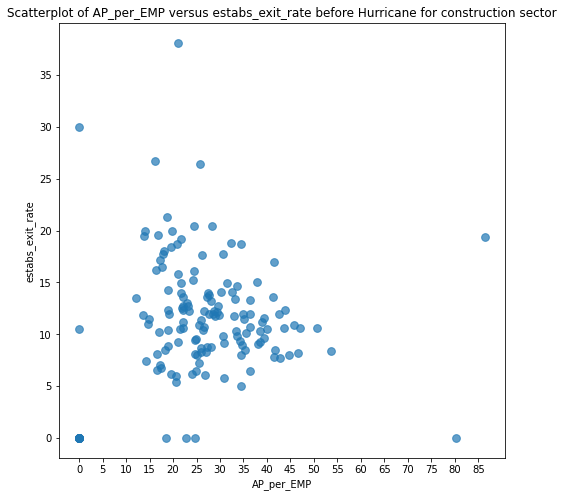

In [738]:
def scatterplot(df, txt):
    fig, ax = plt.subplots(figsize = (8,8))
    x = df["AP_per_EMP"]
    y = df["estabs_exit_rate"]
    ax.scatter(x, y, s=60, alpha=0.7)
    plt.title("Scatterplot of AP_per_EMP versus estabs_exit_rate "+ txt + " Hurricane for construction sector")
    plt.xlabel("AP_per_EMP")
    plt.ylabel("estabs_exit_rate")
    plt.xticks(np.arange(round(min(x)), round(max(x))+1, 5))
    plt.yticks(np.arange(min(y), max(y)+1, 5))
    plt.show()
scatterplot(cons_before, "before")

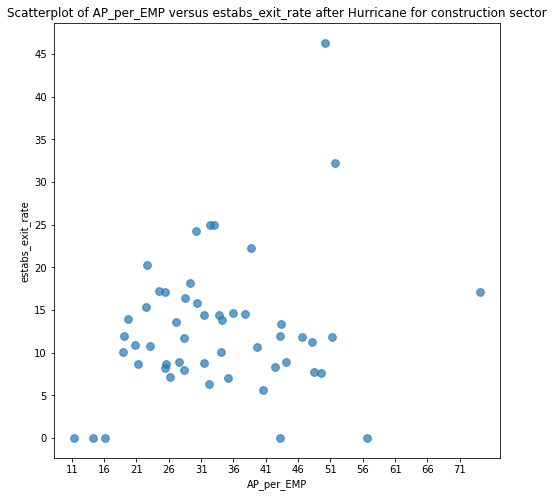

In [739]:
scatterplot(cons_after, "after")